In [90]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

In [91]:
def SecantMethod(f, a, b, e, N=MaxIterations):
    
    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)
    x1 = copy.copy(b)
    
    print('\n\n*** SECANT METHOD IMPLEMENTATION ***')
    
    data =[]            # list for storing data to plot table and function plot
    accuracy = []       # list for storing data to plot graph
    
    step = 1

    while step <= N:
        if f(x0) == f(x1):
            print('Divide by zero error!') 
            break
        
        x2 = x1 - (x1-x0)*f(x1)/( f(x1) - f(x0) ) 
        
        accuracyReached = abs(x2-x1)

        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])

        print(f'Iteration-{step:3}, a = {x0:.6f}   b ={x1:.6f}  c = {x2:.6f}  f(x2) = {f(x2):.6f}')
        
        # Adding data in data list which was created for plotting table and function plot
        data.append([step,x0,x1,x2,f(x2)])

        if(accuracyReached<e):
            print("\nFinal Root Found")
            print(f'Iteration-{step:3}, a = {x0:.6f}   b ={x1:.6f}  c = {x2:.6f}  f(x2) = {f(x2):.6f}')
            print(f'Required root is: {x1:3.15f}')
            break
        
        x0 = x1
        x1 = x2

        step = step + 1         # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it    
    table = ptbl(['Iteration','x0','x1','x2','f(x2)'])
    for dt in data:
        table.add_row(dt)

    if(step > N):
        print('\nNot Convergent.')   
    return accuracy,table,data

In [92]:
# Defining Function
def f(x):
    q = cos(x) - x*exp(x)
    return q

# Initial Guesses and accuracy
x0 = 0.0
x1 = 1.0

e = 0.001

In [93]:
s_acc,Secant_table,s_data = SecantMethod(f,x0,x1,e)



*** SECANT METHOD IMPLEMENTATION ***
Iteration-  1, a = 0.000000   b =1.000000  c = 0.314665  f(x2) = 0.519871
Iteration-  2, a = 1.000000   b =0.314665  c = 0.446728  f(x2) = 0.203545
Iteration-  3, a = 0.314665   b =0.446728  c = 0.531706  f(x2) = -0.042931
Iteration-  4, a = 0.446728   b =0.531706  c = 0.516904  f(x2) = 0.002593
Iteration-  5, a = 0.531706   b =0.516904  c = 0.517747  f(x2) = 0.000030

Final Root Found
Iteration-  5, a = 0.531706   b =0.516904  c = 0.517747  f(x2) = 0.000030
Required root is: 0.516904467567368


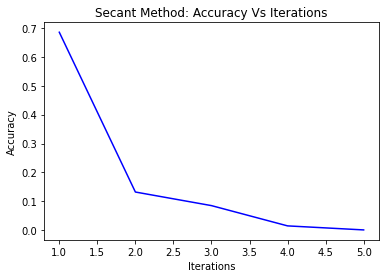

In [94]:
s_i = []
s_a = []
for i in s_acc:
    s_i.append(i[0])
    s_a.append(i[1])
plt.title("Secant Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(s_i,s_a,color = 'blue')
plt.show()

In [95]:
print(Secant_table)

+-----------+--------------------+--------------------+--------------------+------------------------+
| Iteration |         x0         |         x1         |         x2         |         f(x2)          |
+-----------+--------------------+--------------------+--------------------+------------------------+
|     1     |        0.0         |        1.0         | 0.314665337800771  |   0.5198711737709334   |
|     2     |        1.0         | 0.314665337800771  | 0.446728144591334  |   0.2035447777683207   |
|     3     | 0.314665337800771  | 0.446728144591334  | 0.5317058606445456 | -0.042931093234745754  |
|     4     | 0.446728144591334  | 0.5317058606445456 | 0.5169044675673677 | 0.0025927631411296614  |
|     5     | 0.5317058606445456 | 0.5169044675673677 | 0.517747465271495  | 3.0111941065058545e-05 |
+-----------+--------------------+--------------------+--------------------+------------------------+


## Function Plot

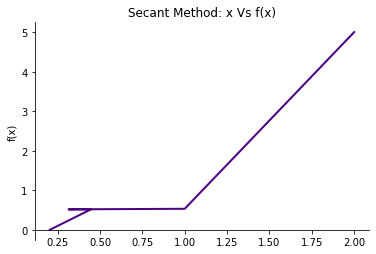

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')  # To move y-axis to center
ax.spines['bottom'].set_position(('data',0))    # To move x-axis to center

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.title("Secant Method: x Vs f(x)")
plt.ylabel("f(x)")

# plt.plot(s_a,s_fa,color='indigo',linewidth=2)
# plt.plot(s_b,s_fb,color='indigo',linewidth=2)
plt.plot(s_data[:][1],s_data[:][-1],color='indigo',linewidth=2)
plt.show()
